# **SpaceX  Falcon 9 First Stage Landing Prediction**
## Data Visualization , EDA and Data Feature Engineering




## Objectives

We perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Our Libraries and Auxiliary Functions


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


Viewing our dataset


In [2]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber </code> vs. <code>PayloadMass </code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


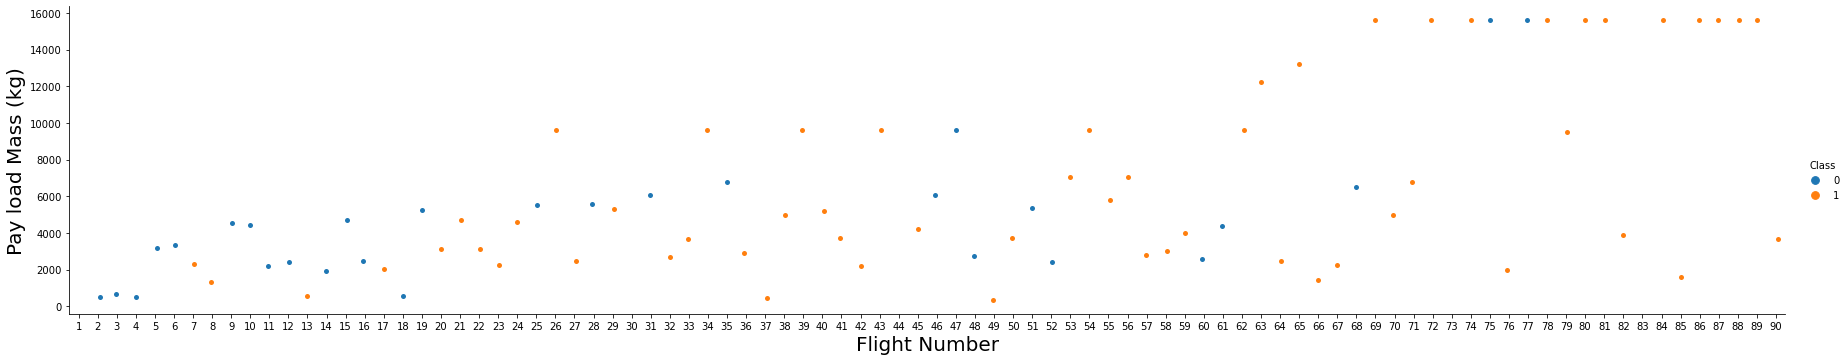

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### Relationship between Flight Number and Launch Site


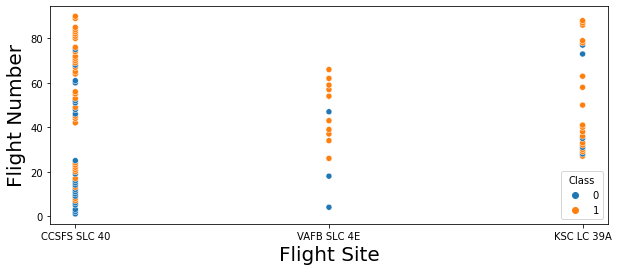

In [4]:
fig = plt.figure(figsize=(10,4))
sns.scatterplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Site",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

The more amount of flights at a launch site the greater the success rate at a launch site.

### The relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.



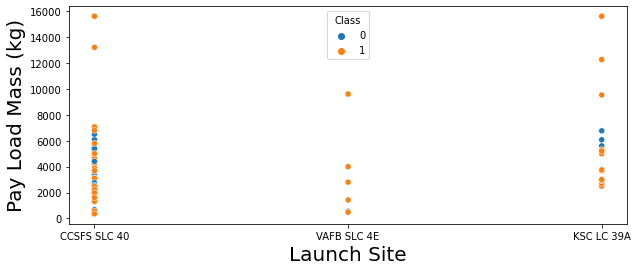

In [5]:
fig = plt.figure(figsize=(10,4))
sns.scatterplot(y="PayloadMass",x="LaunchSite",hue ="Class",data=df)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay Load Mass (kg)",fontsize=20)
plt.show()

The greater the payload mass for Launch Site CCAFS SLC 40 the higher the success rate for the Rocket.

There is not quite a clear pattern to be found using this visualization to make a decision if the Launch Site is dependant on Pay Load Mass for a success launch. 

### Relationship between success rate of each orbit type
We want to visually check if there are any relationship between success rate and orbit type.


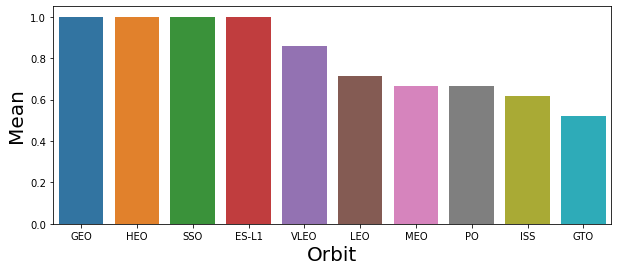

In [6]:
fig = plt.figure(figsize=(10,4))
order =['GEO','HEO','SSO','ES-L1','VLEO','LEO','MEO','PO','ISS', 'GTO']
sns.barplot(x="Orbit",y="Class", data=df, order=order, ci=None)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Mean",fontsize=20)
plt.show()

Orbit GEO,HEO,SSO,ES-L1 has the best Success Rate


### Relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


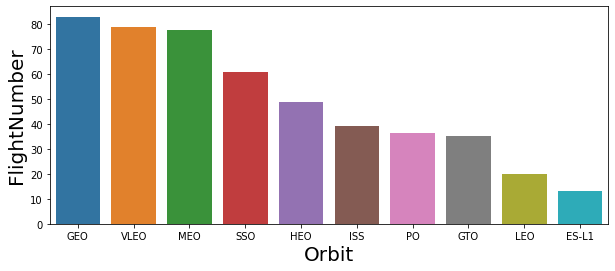

In [7]:
fig = plt.figure(figsize=(10,4))
order =['GEO','VLEO','MEO','SSO','HEO','ISS','PO','GTO','LEO', 'ES-L1']
sns.barplot(x="Orbit",y="FlightNumber", data=df, order=order, ci=None)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Relationship between Payload and Orbit type


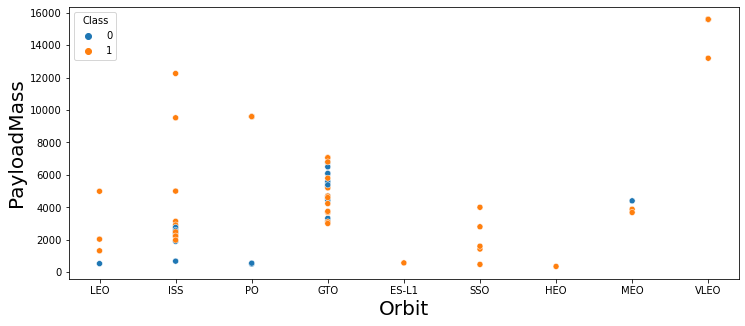

In [18]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(x="Orbit",y="PayloadMass",hue="Class",data = df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### Launch Success Yearly Trend


In [26]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


In [27]:
df['year']=Extract_year(df["Date"])
df_groupby_year=df.groupby("year",as_index=False)["Class"].mean()

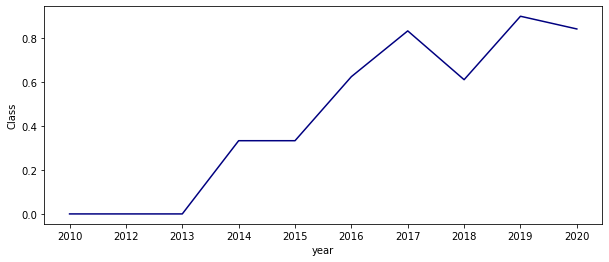

In [51]:
fig = plt.figure(figsize=(10,4))
sns.lineplot(data=df_groupby_year, x="year", y="Class", color='navy' );

From 2013  they has been steady increase in the successfull landing although they is a deep in 2017 but picked backup in 2018 

you can observe that the success rate since 2013 kept increasing till 2020


## Features Engineering


In [32]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,NaN,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [33]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = features

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Orbit'])], axis=1)
features_one_hot.drop(['Orbit'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LaunchSite'])], axis=1)
features_one_hot.drop(['LaunchSite'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LandingPad'])], axis=1)
features_one_hot.drop(['LandingPad'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Serial'])], axis=1)
features_one_hot.drop(['Serial'], axis = 1,inplace=True)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,NaN,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
features_one_hot = features_one_hot.astype(float)
features_one_hot.to_csv('dataset_part_3.csv', index=False)